In [5]:
!pip install wordcloud


--- Food Allowance Options for MotorPH ---

Option 1: Fixed Food Allowance
Based on average prices of staples, a fixed allowance of PHP 270.93 per month could be considered.
This ensures coverage for essential food items across all regions.

Option 2: Tiered Food Allowance by Region
A tiered allowance system could be implemented based on the average food costs in each region.
Region                                Commodity              
Autonomous region in Muslim Mindanao  Meat (pork)                185.863852
                                      Rice (regular, milled)      38.146243
Cordillera Administrative region      Meat (pork)                242.934167
                                      Rice (regular, milled)      37.164848
National Capital region               Meat (pork)                169.660208
                                      Rice (milled, superior)     30.211411
                                      Rice (regular, milled)      27.395153
Region I                  

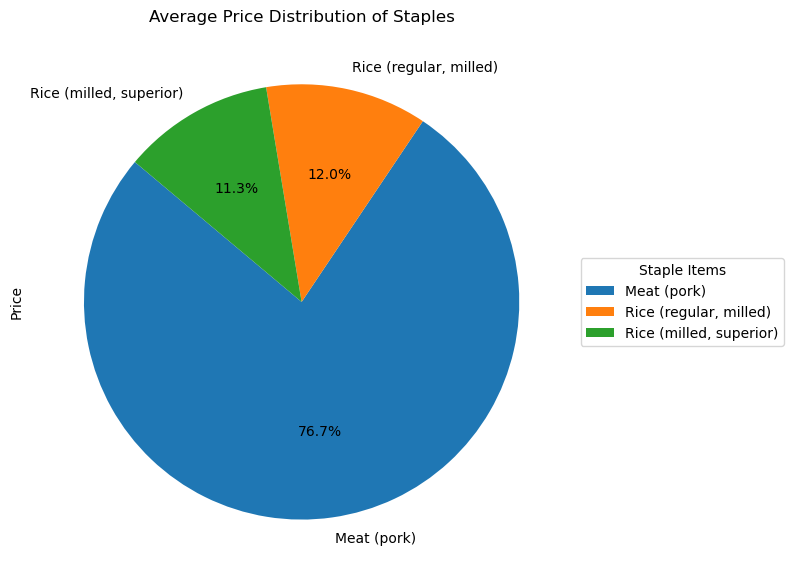


--- Alternative: Salary Increase Considerations ---
A salary increase would provide employees with more flexibility, but it may not be sustainable for the company.
Additionally, the tax implications of a salary increase should be taken into account.


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
try:
    df = pd.read_csv("Dataset-for-PH-Food-Prices.csv")
except FileNotFoundError:
    print("Error: The file 'Dataset-for-PH-Food-Prices.csv' was not found.  Make sure it's in the same directory as your script, or provide the full path.")
    exit()
except Exception as e:
    print(f"An error occurred while reading the CSV file: {e}")
    exit()

# Data Cleaning and Preparation
df['Date'] = pd.to_datetime(df['Date'])
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')  # Convert to numeric, handle errors
df.dropna(subset=['Price'], inplace=True)  # Remove rows with missing prices

# --- Identify Staples (Example) ---
# This is a simplified example.  You might need more sophisticated logic.
staples = ['Rice (milled, superior)', 'Rice (regular, milled)', 'Meat (pork)']
df_staples = df[df['Commodity'].isin(staples)]

# --- Analyze Price Trends ---
# Calculate average prices for staples over the entire period
avg_prices = df_staples.groupby('Commodity')['Price'].mean().sort_values(ascending=False)

# --- Propose Food Allowance Options ---

print("\n--- Food Allowance Options for MotorPH ---")

# Option 1: Fixed Allowance Based on Average Staple Costs
allowance_option1 = avg_prices.sum()  # Sum of average prices of staples
print(f"\nOption 1: Fixed Food Allowance")
print("Based on average prices of staples, a fixed allowance of PHP {:.2f} per month could be considered.".format(allowance_option1))
print("This ensures coverage for essential food items across all regions.")

# Option 2: Tiered Allowance Based on Region
regional_avg_prices = df_staples.groupby(['Region', 'Commodity'])['Price'].mean()
print("\nOption 2: Tiered Food Allowance by Region")
print("A tiered allowance system could be implemented based on the average food costs in each region.")
print(regional_avg_prices)

# Option 3: Food Voucher System
print("\nOption 3: Food Voucher System")
print("Partner with local grocery stores to provide employees with food vouchers.")
print("This allows employees to purchase food items of their choice while controlling the budget.")

# --- Visualization: Pie Chart of Average Staple Prices ---
plt.figure(figsize=(8, 8))  # Creates a new figure with a specified size (width=8 inches, height=8 inches).  This ensures the pie chart is a good size and not too small.

plt.pie(avg_prices,  # Creates the pie chart using the 'avg_prices' data (average prices of staple foods).
        labels=avg_prices.index,  # Sets the labels for each slice of the pie chart. The labels are taken from the index of the 'avg_prices' Series (which are the names of the staple foods).
        autopct='%1.1f%%',  # Formats the percentage displayed on each slice of the pie chart. '%1.1f%%' means one decimal place followed by a percent sign.
        startangle=140)  # Rotates the pie chart so that the first slice starts at a 140-degree angle.  This can improve the visual appeal.

plt.title('Average Price Distribution of Staples')  # Sets the title of the pie chart to "Average Price Distribution of Staples".

plt.ylabel('Price') # while a pie chart is used for distribution it is important to label this as price

plt.legend(title="Staple Items",  # Adds a legend to the pie chart with the title "Staple Items".
           loc="center left",  # Specifies the location of the legend as "center left" of the chart.
           bbox_to_anchor=(1, 0.5))  # Adjusts the position of the legend relative to the chart. (1, 0.5) places the legend to the right of the chart, vertically centered.  This prevents the legend from overlapping the pie chart.

plt.tight_layout()  # Adjusts the layout of the plot to make sure everything fits without overlapping.  This is especially important when you have a legend outside the main plot area.

plt.show()  # Displays the generated pie chart.


# --- Alternative: Salary Increase Considerations ---
print("\n--- Alternative: Salary Increase Considerations ---")
print("A salary increase would provide employees with more flexibility, but it may not be sustainable for the company.")
print("Additionally, the tax implications of a salary increase should be taken into account.")

